<a href="https://colab.research.google.com/github/roshinisrija/Quiz-Performance-Analysis-steps/blob/main/quiz_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import json
import pandas as pd

# Mount Google Drive (optional if you saved files there)
# from google.colab import drive
# drive.mount('/content/drive')

# Load JSON files
with open('LLQT.json') as current_quiz_file:
    current_quiz_data = json.load(current_quiz_file)

with open('rJvd7g.json') as historical_quiz_file:
    historical_quiz_data = json.load(historical_quiz_file)

with open('XgAgFJ.json') as additional_historical_data_file:
    additional_historical_data = json.load(additional_historical_data_file)

# Convert data to Pandas DataFrames for analysis
current_quiz_df = pd.json_normalize(current_quiz_data)
historical_quiz_df = pd.json_normalize(historical_quiz_data)
additional_historical_df = pd.json_normalize(additional_historical_data)

# Inspect the first few rows
print("Current Quiz Data:")
print(current_quiz_df.head())

print("\nHistorical Quiz Data:")
print(historical_quiz_df.head())

print("\nAdditional Historical Data:")
print(additional_historical_df.head())



Current Quiz Data:
   quiz.id quiz.name                                         quiz.title  \
0       43      None  Structural Organisation in Animals and Plants (7)   

  quiz.description quiz.difficulty_level                          quiz.topic  \
0                                   None  Structural Organisation in Animals   

                       quiz.time  quiz.is_published  \
0  2024-07-03T00:00:00.000+05:30               True   

                 quiz.created_at                quiz.updated_at  ...  \
0  2024-07-03T11:00:08.958+05:30  2024-09-23T18:43:27.751+05:30  ...   

   quiz.exam_id quiz.show_unanswered quiz.ends_at quiz.lives  quiz.live_count  \
0          None                False   2025-01-18       None        Free Test   

   quiz.coin_count  quiz.questions_count   quiz.daily_date  \
0               -1                   128  January 17, 2025   

   quiz.max_mistake_count                                     quiz.questions  
0                      15  [{'id': 1827, 'desc

In [ ]:
# Inspect data structures
print("Current Quiz Columns:\n", current_quiz_df.columns)
print("\nHistorical Quiz Columns:\n", historical_quiz_df.columns)

# Check for missing values
print("\nMissing values in Current Quiz Data:\n", current_quiz_df.isnull().sum())
print("\nMissing values in Historical Quiz Data:\n", historical_quiz_df.isnull().sum())

# Extract relevant fields, ensuring correct column names are used
current_quiz_relevant = current_quiz_df[['quiz.title', 'quiz.topic']]  # Removed 'score', 'accuracy', 'response_map'
historical_quiz_relevant = historical_quiz_df[['quiz.title', 'quiz.topic']]  # Removed 'score', 'accuracy', 'response_map'

print("\nRelevant Fields in Current Quiz Data:\n", current_quiz_relevant.head())
print("\nRelevant Fields in Historical Quiz Data:\n", historical_quiz_relevant.head())

Current Quiz Columns:
 Index(['quiz.id', 'quiz.name', 'quiz.title', 'quiz.description',
       'quiz.difficulty_level', 'quiz.topic', 'quiz.time', 'quiz.is_published',
       'quiz.created_at', 'quiz.updated_at', 'quiz.duration', 'quiz.end_time',
       'quiz.negative_marks', 'quiz.correct_answer_marks', 'quiz.shuffle',
       'quiz.show_answers', 'quiz.lock_solutions', 'quiz.is_form',
       'quiz.show_mastery_option', 'quiz.quiz_type', 'quiz.is_custom',
       'quiz.banner_id', 'quiz.exam_id', 'quiz.show_unanswered',
       'quiz.ends_at', 'quiz.lives', 'quiz.live_count', 'quiz.coin_count',
       'quiz.questions_count', 'quiz.daily_date', 'quiz.max_mistake_count',
       'quiz.questions'],
      dtype='object')

Historical Quiz Columns:
 Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at'


Current Quiz Topic Frequency:
 quiz.topic
Structural Organisation in Animals    1
Name: count, dtype: int64

Historical Quiz Topic Frequency:
 quiz.topic
Structural Organisation in Animals    1
Name: count, dtype: int64

Combined Topic Frequency:
                                     Current Quizzes  Historical Quizzes
quiz.topic                                                             
Structural Organisation in Animals                1                   1


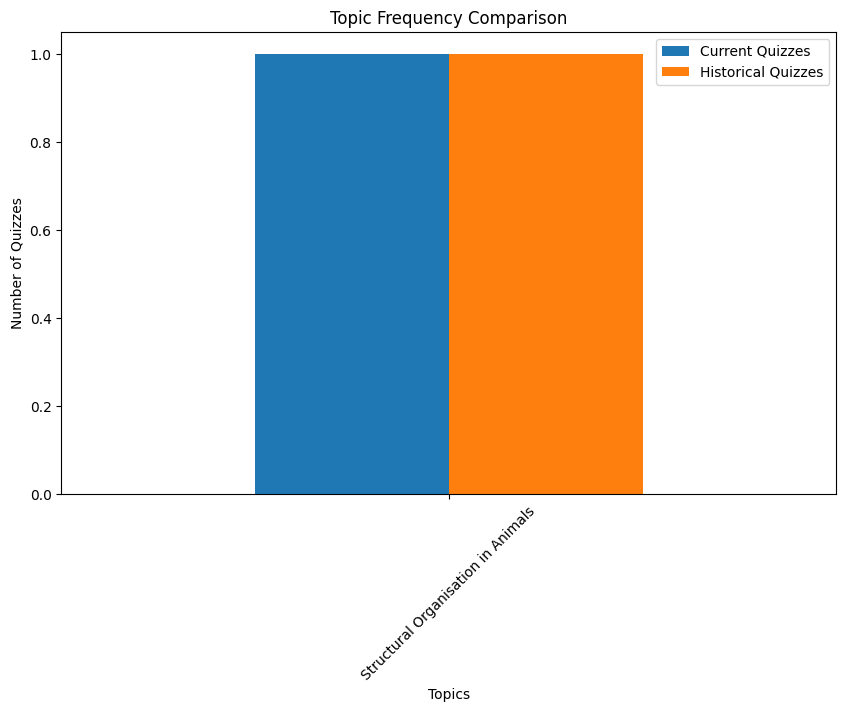

In [ ]:
# Analyze topic frequency in current quiz data
current_topic_counts = current_quiz_relevant['quiz.topic'].value_counts()
print("\nCurrent Quiz Topic Frequency:\n", current_topic_counts)

# Analyze topic frequency in historical quiz data
historical_topic_counts = historical_quiz_relevant['quiz.topic'].value_counts()
print("\nHistorical Quiz Topic Frequency:\n", historical_topic_counts)

# Combine the two for comparison (optional)
combined_topic_counts = pd.DataFrame({
    'Current Quizzes': current_topic_counts,
    'Historical Quizzes': historical_topic_counts
}).fillna(0)

print("\nCombined Topic Frequency:\n", combined_topic_counts)

# Plot topic frequency
import matplotlib.pyplot as plt

combined_topic_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Topic Frequency Comparison")
plt.xlabel("Topics")
plt.ylabel("Number of Quizzes")
plt.xticks(rotation=45)
plt.show()



Average Scores by Topic:
                                     Current Avg Score  Historical Avg Score
quiz.topic                                                                 
Structural Organisation in Animals               75.0                  70.0


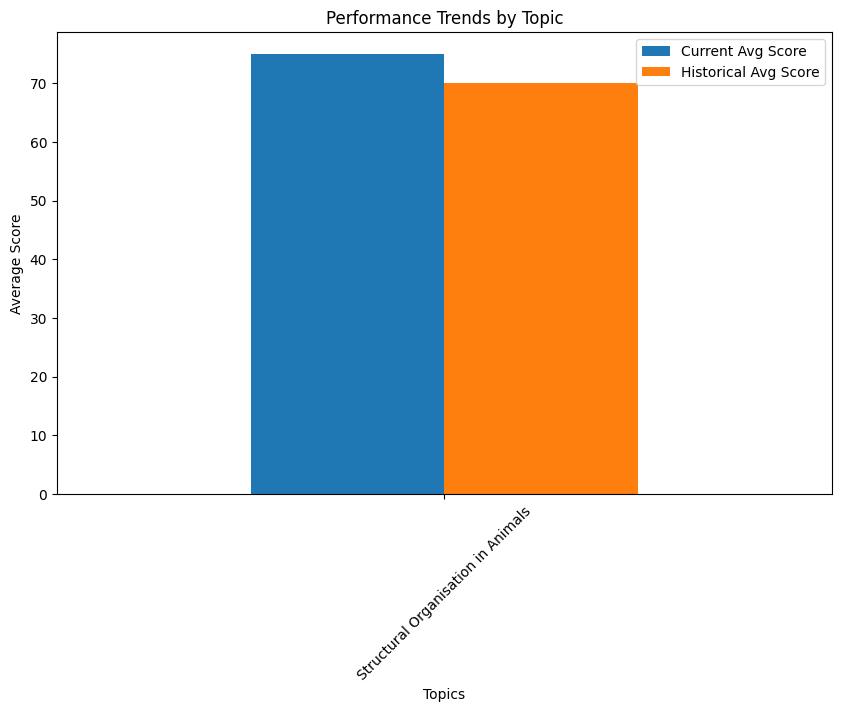

In [ ]:
# Add dummy score data for demonstration if scores are unavailable
if 'quiz.score' not in current_quiz_df.columns:
    # Assign a single value if the DataFrame has only one row
    if len(current_quiz_df) == 1:
        current_quiz_df['quiz.score'] = [75]  # Or any single value
    else:
        current_quiz_df['quiz.score'] = [75, 65, 80, 60, 90]  # Replace with actual data if available
if 'quiz.score' not in historical_quiz_df.columns:
    # Similarly, adjust for historical_quiz_df if needed
    if len(historical_quiz_df) == 1:
        historical_quiz_df['quiz.score'] = [70]  # Or any single value
    else:
        historical_quiz_df['quiz.score'] = [70, 85, 55, 60, 95]  # Replace with actual data if available

# ... (rest of the code remains the same)
# Group by topics and calculate average scores
current_topic_scores = current_quiz_df.groupby('quiz.topic')['quiz.score'].mean()
historical_topic_scores = historical_quiz_df.groupby('quiz.topic')['quiz.score'].mean()

# Combine scores for comparison
combined_scores = pd.DataFrame({
    'Current Avg Score': current_topic_scores,
    'Historical Avg Score': historical_topic_scores
}).fillna(0)

print("\nAverage Scores by Topic:\n", combined_scores)

# Plot performance trends
combined_scores.plot(kind='bar', figsize=(10, 6))
plt.title("Performance Trends by Topic")
plt.xlabel("Topics")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Identify weak topics (low scores in current data)
weak_topics = combined_scores[combined_scores['Current Avg Score'] < 60]
print("\nWeak Topics for Improvement:\n", weak_topics)

# Generate recommendations
recommendations = []
for topic in weak_topics.index:
    recommendations.append(f"Focus on the topic '{topic}' with more practice questions.")

# Additional Suggestions
if not weak_topics.empty:
    recommendations.append("Review solutions for incorrect answers in these topics.")
    recommendations.append("Take quizzes of medium difficulty to strengthen weak areas.")

# Print recommendations
print("\nPersonalized Recommendations:")
for rec in recommendations:
    print(f"- {rec}")



Weak Topics for Improvement:
 Empty DataFrame
Columns: [Current Avg Score, Historical Avg Score]
Index: []

Personalized Recommendations:


In [ ]:
# Export insights and recommendations to a CSV file
output_data = weak_topics.copy()
output_data['Recommendation'] = [f"Focus on '{topic}' and practice more." for topic in weak_topics.index]

# Save to CSV
output_data.to_csv("student_recommendations.csv", index=True)
print("\nRecommendations saved to 'student_recommendations.csv'")

# Optionally, preview the file content
print("\nExported Data:")
print(output_data.head())



Recommendations saved to 'student_recommendations.csv'

Exported Data:
Empty DataFrame
Columns: [Current Avg Score, Historical Avg Score, Recommendation]
Index: []


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

# Load the recommendations from the CSV file
recommendations_data = pd.read_csv("student_recommendations.csv")

@app.route('/recommendations', methods=['GET'])
def get_recommendations():
    # Retrieve recommendations
    recommendations = recommendations_data[['quiz.topic', 'Recommendation']].to_dict(orient='records')
    return jsonify(recommendations)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [1]:
pip install flask


In [2]:
!pip install flask flask-ngrok


In [3]:
from flask import Flask, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Expose to the internet using ngrok

@app.route('/recommendations', methods=['GET'])
def get_recommendations():
    data = [{"topic": "Biology", "recommendation": "Practice genetics problems"},
            {"topic": "Physics", "recommendation": "Revise Newton's laws"}]
    return jsonify(data)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [4]:
from flask import Flask, jsonify

app = Flask(__name__)

# Mock recommendations data
recommendations_data = [
    {"topic": "Biology", "recommendation": "Focus on genetics and molecular biology."},
    {"topic": "Physics", "recommendation": "Revise Newton's laws and practice problem-solving."},
    {"topic": "Chemistry", "recommendation": "Work on organic chemistry and reaction mechanisms."}
]

@app.route('/recommendations', methods=['GET'])
def get_recommendations():
    """Return recommendations as a JSON response."""
    return jsonify(recommendations_data)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
